Problem Set 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt

We delete clients who leave the company (Churn=Yes)

In [3]:
df = pd.read_csv (r'customers.csv') #import data
positive_churn = df.Churn=='Yes' #find customers who leave the company (churn) 
df = df.drop(df[positive_churn].index) #delete them from the DataFrame
#df.reindex(range(len(df)), method='backfill') #reindex the series

In [4]:
number_tot = len(positive_churn) #total number of clients
number_positive_churn = len(df) #number of clients who do NOT leave the company 
perc_positive_tot=number_positive_churn/number_tot
print('Percentage of clients who remain with the company (on the total) = %.3f' % perc_positive_tot)
print('Percentage of clients who leave the company (on the total) = %.3f' % (1-perc_positive_tot))

Percentage of clients who remain with the company (on the total) = 0.735
Percentage of clients who leave the company (on the total) = 0.265


In [5]:
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0, downcast='infer') # in order to convert total charges in floting datas and correct possible errors
df["SeniorCitizen"] = df.SeniorCitizen.astype('O')

In [6]:
print ("Summary statistics of the floating types variables")
df.describe()

Summary statistics of the floating types variables


,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000
mean,37.569965,61.265124,2549.911442
std,24.113777,31.092648,2329.954215
min,0.000000,18.250000,0.000000
25%,15.000000,25.100000,572.900000
50%,38.000000,64.425000,1679.525000
75%,61.000000,88.400000,4262.850000
max,72.000000,118.750000,8672.450000


In the following section, an analysis of the main parameters that can characterize the customers is done focusing on their personal characteristics and on the products they are more likely to buy.

In [7]:
#analize only Object variables
df_obj=df.select_dtypes(include=['O']) #include only the objects
df_obj=df_obj.drop(columns="customerID") #cancel costumer column

In [8]:
print ("Percentages of the possible values for each single object")
df_obj = df.select_dtypes(include=['O'])
df_obj = df_obj.drop(columns="customerID")
for c in df_obj.columns:
    print ("\n---- %s ---" % c)
    print (df[c].value_counts(normalize=True)) #normalize to have the percentage

Percentages of the possible values for each single object

---- gender ---
Male      0.507344
Female    0.492656
Name: gender, dtype: float64

---- SeniorCitizen ---
0    0.871279
1    0.128721
Name: SeniorCitizen, dtype: float64

---- Partner ---
Yes    0.528218
No     0.471782
Name: Partner, dtype: float64

---- Dependents ---
No     0.655199
Yes    0.344801
Name: Dependents, dtype: float64

---- PhoneService ---
Yes    0.901044
No     0.098956
Name: PhoneService, dtype: float64

---- MultipleLines ---
No                  0.491109
Yes                 0.409934
No phone service    0.098956
Name: MultipleLines, dtype: float64

---- InternetService ---
DSL            0.379204
Fiber optic    0.347700
No             0.273096
Name: InternetService, dtype: float64

---- OnlineSecurity ---
No                     0.393699
Yes                    0.333204
No internet service    0.273096
Name: OnlineSecurity, dtype: float64

---- OnlineBackup ---
Yes                    0.368380
No                

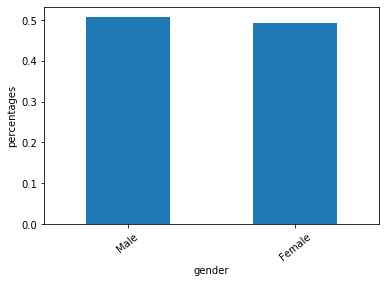

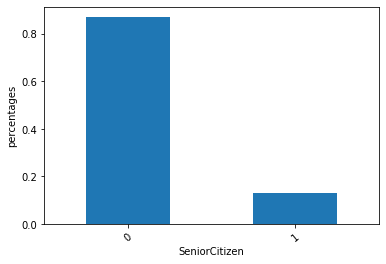

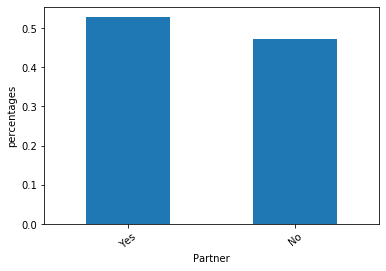

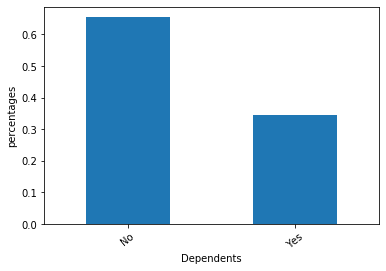

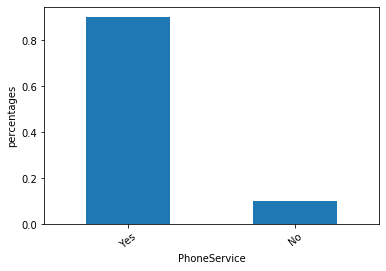

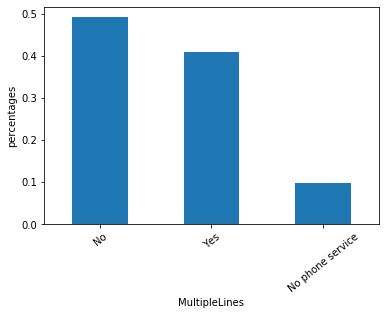

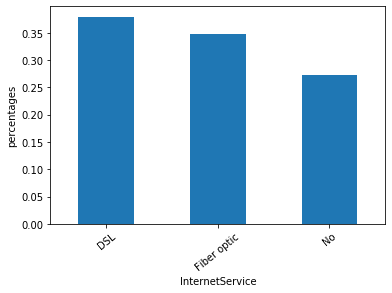

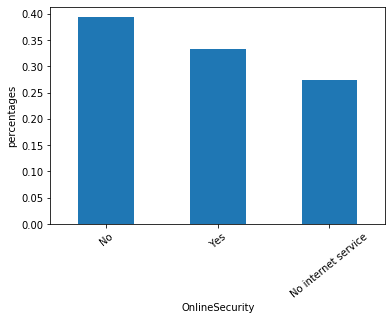

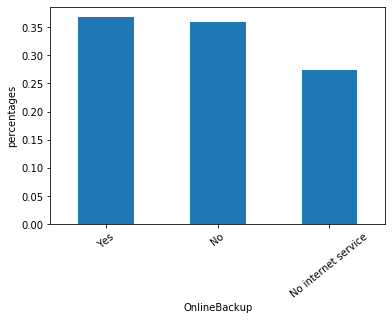

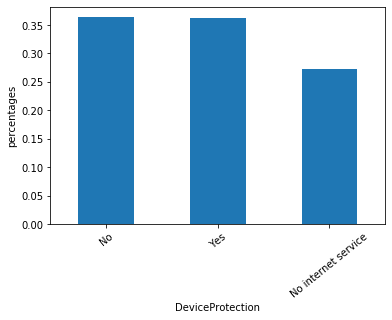

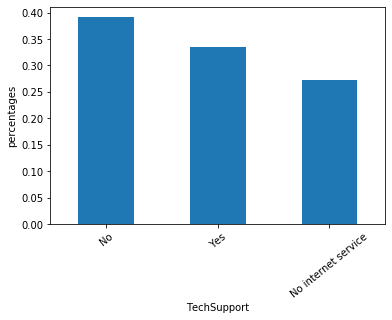

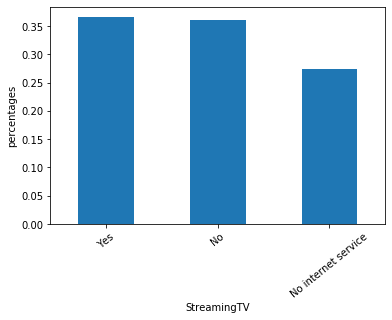

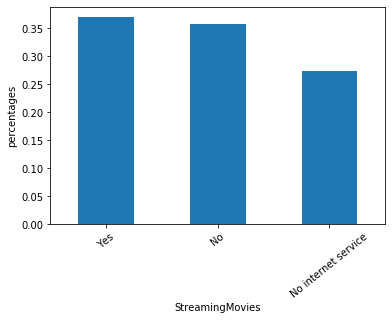

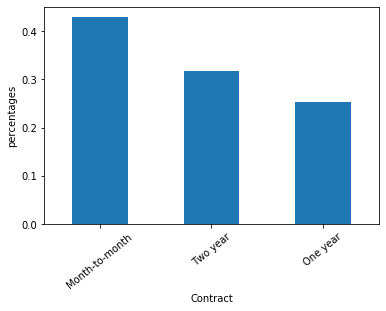

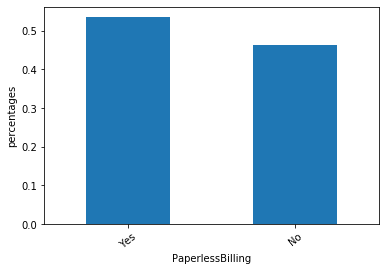

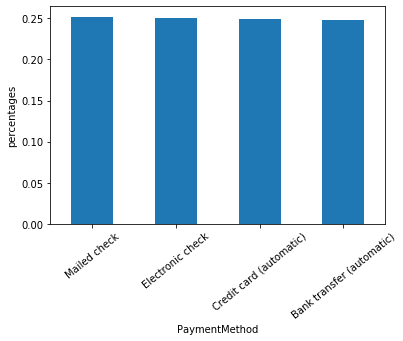

In [9]:
df_obj_plot = df_obj.drop(columns="Churn")

#plots:
for c in df_obj_plot.columns:
    prob = df_obj_plot[c].value_counts(normalize=True)
    prob.plot(kind='bar',x=c)
    plt.xticks(rotation=39)
    plt.xlabel(c)
    plt.ylabel('percentages')
    plt.show()
    plt.close()

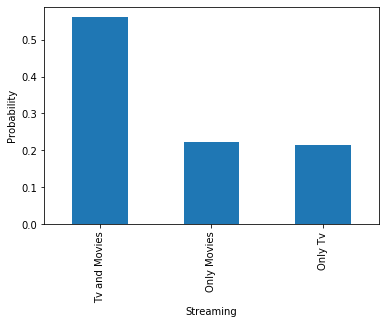

In [6]:
#Creation of a DataFrame describing which clients have streaming Tv and streaming Movies

s=[] #where to save the information for each costumer
for i in df.index:
    if  (df.StreamingTV[i] == 'Yes') and (df.StreamingMovies[i] == 'Yes'): #both
        s += ['Tv and Movies']
    elif (df.StreamingTV[i] == 'No') and (df.StreamingMovies[i] == 'Yes'): #only Movies
        s += ['Only Movies']
    elif (df.StreamingTV[i] == 'Yes') and (df.StreamingMovies[i] == 'No'): #only tv
        s += ['Only Tv']
        
ss = pd.Series(s) 
prob=ss.value_counts(normalize=True) #count and work in percentage
prob.plot(kind='bar')
plt.xlabel('Streaming')
plt.ylabel('Probability')
plt.show()
plt.close()
#hien per favore aggiungici le percentuali

The previous graph shows the preferences of the customers regarding the streaming service offered by the company.

In particular, it can be observed that xx% of the customers of the company pay for a streaming service.

Among the streaming service customer, it can be observed that more than half decides to access both the Tv and Movies services. 

The remaining customers are equally likely to subscribe either for the Movies or for the Tv service.

In [7]:
#between how many clients who do not have a phone line, look for ones who have internet
yesInternet_noPhone = 0 #counter
noPhone = 0
for i in df.index:
    if (df.PhoneService[i]=='No'): #if not phone service
        noPhone += 1
        #count how many have internet
        if(df.InternetService[i]!='No'):
            yesInternet_noPhone += 1

perc = yesInternet_noPhone / noPhone *100 #percentage of clients who have internet and not phone
print('The percentage of clients who have internet and do not have phone service is %.2f ' % perc) #Decide if it is the case to keep this, in case change the text

The percentage of clients who have internet and do not have phone service is 100.00 


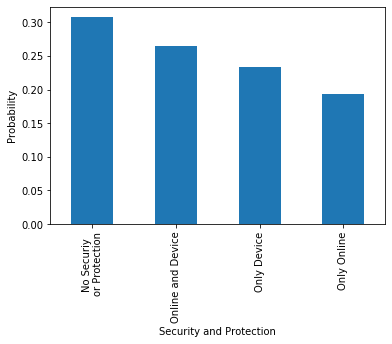

0.3078968359478862


In [15]:
#clients interesed in protection: how many have have online security and/or device protection

s=[] #where to save the information for each costumer
for i in df.index:
    if (df.OnlineSecurity[i] == 'Yes') and (df.DeviceProtection[i] == 'Yes'): #both
        s += ['Online and Device']
    elif (df.OnlineSecurity[i] == 'Yes') and (df.DeviceProtection[i] == 'No'): #only Movies
        s += ['Only Online']
    elif (df.OnlineSecurity[i] == 'No') and (df.DeviceProtection[i] == 'Yes'): #only tv
        s += ['Only Device']
    elif (df.OnlineSecurity[i] == 'No') and (df.DeviceProtection[i] == 'No'): #no
        s += ['No Securiy \nor Protection']
        
ss = pd.Series(s) 
prob=ss.value_counts(normalize=True)  #count and work in percentage
prob.plot(kind='bar')
plt.xlabel('Security and Protection')
plt.ylabel('Probability')
plt.show()
plt.close()

num_NoServicesProtection = s.count('No Securiy \nor Protection')
num_tot = len(s)
perc_NoServicesProtection = num_NoServicesProtection/num_tot
print(perc_NoServicesProtection)

The previous graph shows the preferences of the customers regarding the security and protection services offered by the company.

In particular, it can be observed that xx% of the customers decides not to protect themselves neither with and online nor with an offline security service. 

Among the other xx%, it can be observed that xx% decides to have both an online and a device protection.

The rest of the customers are more likely to protect their devices than the online services.

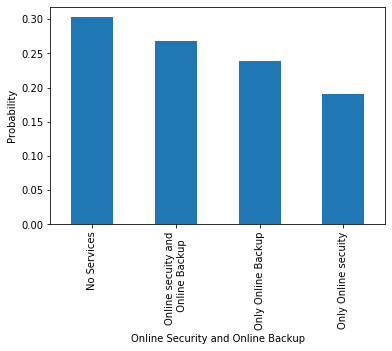

0.302579101302845


In [13]:
#clients interesed in online services: online security and/or online backup

s=[] #where to save the information for each costumer
for i in df.index:
    if (df.OnlineSecurity[i] == 'Yes') and (df.OnlineBackup[i] == 'Yes'): #both
        s += ['Online secuity and\n  Online Backup']
    elif (df.OnlineSecurity[i] == 'Yes') and (df.OnlineBackup[i] == 'No'): #only Movies
        s += ['Only Online secuity']
    elif (df.OnlineSecurity[i] == 'No') and (df.OnlineBackup[i] == 'Yes'): #only tv
        s += ['Only Online Backup']
    elif (df.OnlineSecurity[i] == 'No') and (df.OnlineBackup[i] == 'No'): #no
        s += ['No Services']

ss = pd.Series(s) 
prob=ss.value_counts(normalize=True)  #count and work in percentage
prob.plot(kind='bar')
plt.xlabel('Online Security and Online Backup')
plt.ylabel('Probability')
plt.show()
plt.close()

num_NoServices = s.count('No Services')
num_tot = len(s)
perc_NoServices = num_NoServices/num_tot
print(perc_NoServices)

The previous graphs describes the preferences of the customers regarding the online services offered by the company.

In particular, it can be observed that xx% of the customers decides not to buy any online service.

Among the other xx%, it can be observed that xx% decides to have both an online security and an online backup service.

The rest of the customers are more likely to pay for the online backup rather than the online security offer.